In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('breakeven_prices_refineries.csv')
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year)
0,DE_DEL,156520.0,0,157.0,0,iMSR,1,9.337670,1.472473e+07,-8.069724e+07
1,WR_WOO,457520.0,0,458.0,0,iMSR,3,9.528147,4.295493e+07,-2.406960e+08
2,BP_FER,447888.0,0,448.0,0,iMSR,3,9.689638,4.201705e+07,-2.396223e+08
3,CH_PAS,551432.0,0,552.0,0,PBR-HTGR,6,9.851122,4.990257e+07,-2.999356e+08
4,HO_ART,91504.0,0,92.0,0,PBR-HTGR,1,9.894329,8.317094e+06,-4.998926e+07
5,TE_CAR,288960.0,0,289.0,0,iMSR,2,9.947576,2.710475e+07,-1.587104e+08
6,MA_MAR,431032.0,0,432.0,0,iMSR,3,9.996382,4.051644e+07,-2.379045e+08
7,CH_EL,178192.0,0,179.0,0,PBR-HTGR,2,10.109150,1.618217e+07,-9.946107e+07
8,CH_RIC,794640.0,0,795.0,0,PBR-HTGR,9,10.176285,7.187054e+07,-4.464882e+08
9,PH_BIL,86688.0,0,87.0,0,PBR-HTGR,1,10.335906,7.865078e+06,-4.947181e+07


In [19]:
anr_param = pd.read_excel('ANRs.xlsx', sheet_name='FOAK')
anr_param

,Reactor,Type,Power in MWe,Power in MWt,MSL in MWe,Thermal Efficiency,Thermal transfer efficiency,MDT in hours,Ramp Rate (fraction of capacity/hr),Ramp Rate (MW/hr),Outlet Temp (C),CAPEX $/MWe,FOPEX $/MWe-y,Max Modules,VOM in $/MWh-e,Startupfixedcost in $,Life (y)
0,iPWR,PWR,77.0,250,15.4,0.31,1.000,20,0.4,24.0,302,5535000,115000,12,0.75,38500,30
1,HTGR,HTGR,164.0,350,32.8,0.47,0.897,20,6.0,984.0,950,7500000,164000,4,0.00,82000,30
2,PBR-HTGR,HTGR,80.0,200,32.0,0.40,0.751,20,2.4,48.0,750,4569000,100000,12,0.00,40000,30
3,iMSR,MSR,141.0,300,28.2,0.47,0.936,20,0.6,84.6,700,4091000,85000,12,0.50,70500,30
4,Micro,HTGR,6.7,20,2.7,0.33,0.897,20,6.0,24.0,630,10902000,264000,12,0.00,3350,30


### Compute deployed power at each refinery and cumulative deployed ANR capacity

In [20]:
anr_thermal_power = anr_param[['Power in MWt', 'Reactor']]
anr_thermal_power
df = df.merge(anr_thermal_power, how='inner', left_on=['ANR type'], right_on=['Reactor'])
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df['Deployed Power (MWt)'] = df['Power in MWt']*df['# ANR modules']
df['ANR Nameplate Capacity (GWt)'] = df['Deployed Power (MWt)'].cumsum()/1000
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt)
0,DE_DEL,156520.0,0,157.0,0,iMSR,1,9.337670,1.472473e+07,-8.069724e+07,300,iMSR,300,0.30
1,WR_WOO,457520.0,0,458.0,0,iMSR,3,9.528147,4.295493e+07,-2.406960e+08,300,iMSR,900,1.20
2,BP_FER,447888.0,0,448.0,0,iMSR,3,9.689638,4.201705e+07,-2.396223e+08,300,iMSR,900,2.10
10,CH_PAS,551432.0,0,552.0,0,PBR-HTGR,6,9.851122,4.990257e+07,-2.999356e+08,200,PBR-HTGR,1200,3.30
11,HO_ART,91504.0,0,92.0,0,PBR-HTGR,1,9.894329,8.317094e+06,-4.998926e+07,200,PBR-HTGR,200,3.50
3,TE_CAR,288960.0,0,289.0,0,iMSR,2,9.947576,2.710475e+07,-1.587104e+08,300,iMSR,600,4.10
4,MA_MAR,431032.0,0,432.0,0,iMSR,3,9.996382,4.051644e+07,-2.379045e+08,300,iMSR,900,5.00
12,CH_EL,178192.0,0,179.0,0,PBR-HTGR,2,10.109150,1.618217e+07,-9.946107e+07,200,PBR-HTGR,400,5.40
13,CH_RIC,794640.0,0,795.0,0,PBR-HTGR,9,10.176285,7.187054e+07,-4.464882e+08,200,PBR-HTGR,1800,7.20
14,PH_BIL,86688.0,0,87.0,0,PBR-HTGR,1,10.335906,7.865078e+06,-4.947181e+07,200,PBR-HTGR,200,7.40


### Compute cumulative number of viable refineries and ANR modules

In [21]:
df['Viable ANR modules count'] = df['# ANR modules'].cumsum()
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df['Viable ANR refineries count'] = df.index+1
df.head(5)

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Viable ANR modules count,Viable ANR refineries count
0,DE_DEL,156520.0,0,157.0,0,iMSR,1,9.337670,1.472473e+07,-8.069724e+07,300,iMSR,300,0.3,1,1
1,WR_WOO,457520.0,0,458.0,0,iMSR,3,9.528147,4.295493e+07,-2.406960e+08,300,iMSR,900,1.2,4,2
2,BP_FER,447888.0,0,448.0,0,iMSR,3,9.689638,4.201705e+07,-2.396223e+08,300,iMSR,900,2.1,7,3
3,CH_PAS,551432.0,0,552.0,0,PBR-HTGR,6,9.851122,4.990257e+07,-2.999356e+08,200,PBR-HTGR,1200,3.3,13,4
4,HO_ART,91504.0,0,92.0,0,PBR-HTGR,1,9.894329,8.317094e+06,-4.998926e+07,200,PBR-HTGR,200,3.5,14,5


### Compute avoided carbon emissions 

In [22]:
SMR_carbon_intensity = 11.888 #kgCO2eq/kgH2
df['Ann. avoided CO2 emissions (MMT-CO2/year)'] = (df['Ref. Dem. (kg/day)']*365*SMR_carbon_intensity - df['Ann. carbon emissions (kgCO2eq/year)'])/1e9
df['Viable avoided emissions (MMT-CO2/year)'] = df['Ann. avoided CO2 emissions (MMT-CO2/year)'].cumsum()
df

,ref_id,Ref. Dem. (kg/day),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Ann. carbon emissions (kgCO2eq/year),Net Revenues ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Viable ANR modules count,Viable ANR refineries count,Ann. avoided CO2 emissions (MMT-CO2/year),Viable avoided emissions (MMT-CO2/year)
0,DE_DEL,156520.0,0,157.0,0,iMSR,1,9.337670,1.472473e+07,-8.069724e+07,300,iMSR,300,0.30,1,1,0.664434,0.664434
1,WR_WOO,457520.0,0,458.0,0,iMSR,3,9.528147,4.295493e+07,-2.406960e+08,300,iMSR,900,1.20,4,2,1.942279,2.606714
2,BP_FER,447888.0,0,448.0,0,iMSR,3,9.689638,4.201705e+07,-2.396223e+08,300,iMSR,900,2.10,7,3,1.901423,4.508136
3,CH_PAS,551432.0,0,552.0,0,PBR-HTGR,6,9.851122,4.990257e+07,-2.999356e+08,200,PBR-HTGR,1200,3.30,13,4,2.342827,6.850963
4,HO_ART,91504.0,0,92.0,0,PBR-HTGR,1,9.894329,8.317094e+06,-4.998926e+07,200,PBR-HTGR,200,3.50,14,5,0.388730,7.239693
5,TE_CAR,288960.0,0,289.0,0,iMSR,2,9.947576,2.710475e+07,-1.587104e+08,300,iMSR,600,4.10,16,6,1.226727,8.466420
6,MA_MAR,431032.0,0,432.0,0,iMSR,3,9.996382,4.051644e+07,-2.379045e+08,300,iMSR,900,5.00,19,7,1.829783,10.296204
7,CH_EL,178192.0,0,179.0,0,PBR-HTGR,2,10.109150,1.618217e+07,-9.946107e+07,200,PBR-HTGR,400,5.40,21,8,0.757014,11.053218
8,CH_RIC,794640.0,0,795.0,0,PBR-HTGR,9,10.176285,7.187054e+07,-4.464882e+08,200,PBR-HTGR,1800,7.20,30,9,3.376168,14.429386
9,PH_BIL,86688.0,0,87.0,0,PBR-HTGR,1,10.335906,7.865078e+06,-4.947181e+07,200,PBR-HTGR,200,7.40,31,10,0.368285,14.797670


### Save clean version of results


In [23]:
df_clean = df[["ref_id", 'Ref. Dem. (kg/day)', 'HTSE', 'ANR type', '# ANR modules', 'Net Revenues ($/year)', 'Ann. avoided CO2 emissions (MMT-CO2/year)']]
df_clean.sort_values(by=['Ref. Dem. (kg/day)'], ascending=False, inplace=True)
df_clean['Ref. Dem. (kg/day)'] /=1e3
df_clean['HTSE'] = df_clean['HTSE'].apply(lambda x: int(x))
df_clean['Ref. Dem. (kg/day)'] = df_clean['Ref. Dem. (kg/day)'].apply(lambda x:np.round(x,2))
df_clean['Net Revenues ($/year)'] /=1e6
df_clean['Net Revenues ($/year)'] = df_clean['Net Revenues ($/year)'].apply(lambda x: np.round(x,2))
df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']= df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)'].apply(lambda x: np.round(x,2))
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Net Revenues ($/year)']/df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Avoided cost of CO2 ($/ton)'].apply(lambda x:np.round(np.abs(x),2))
df_clean.rename(columns={'Ref. Dem. (kg/day)': 'Demand (MT H2/day)',
                         'Net Revenues ($/year)': 'Net Revenues (M$/year)', 
                         'ANR type': 'ANR', 
                         '# ANR modules': '#'}, inplace=True)
df_clean.to_csv('breakeven_prices_refineries_clean.csv', index=False)

C:\Users\mgarrou\AppData\Local\Temp\ipykernel_8988\2137664573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sort_values(by=['Ref. Dem. (kg/day)'], ascending=False, inplace=True)
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_8988\2137664573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ref. Dem. (kg/day)'] /=1e3
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_8988\2137664573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### Plots

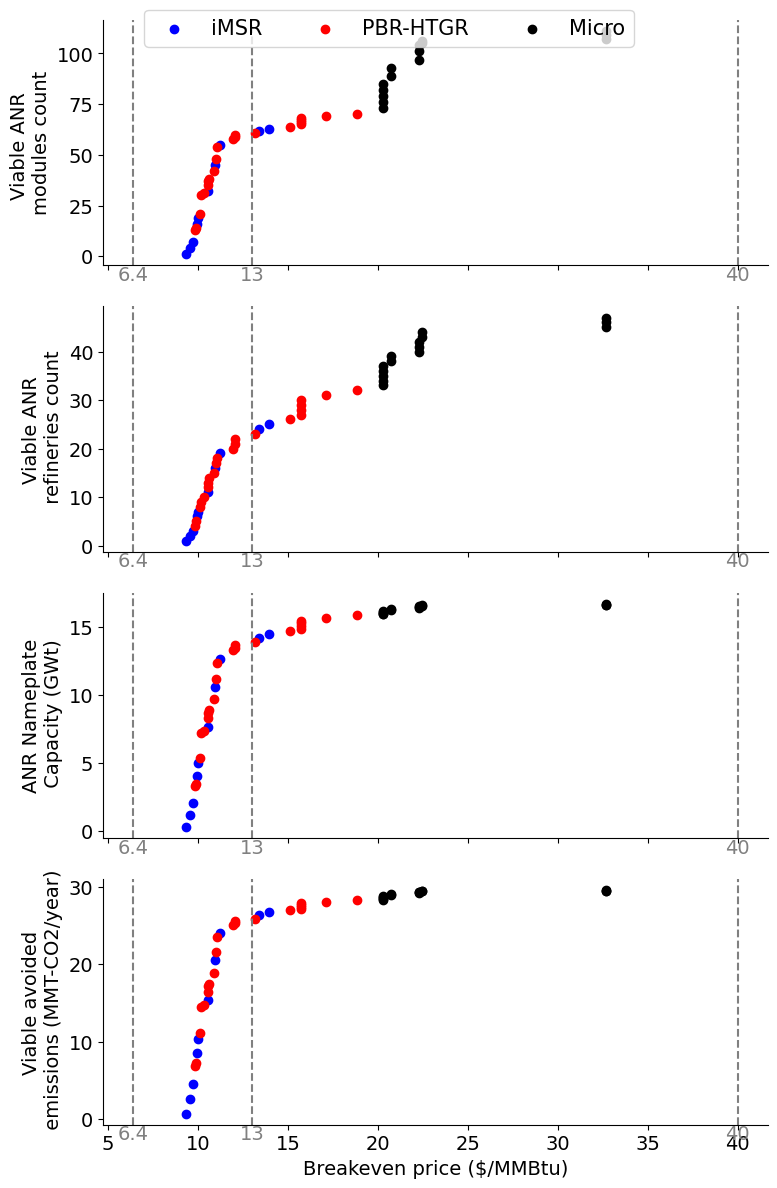

In [24]:
#Use latex font
#plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 14

# Create subplots
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(8, 12))

# Get unique ANR types and assign colors
anr_types = df['ANR type'].unique()

colors = ['blue', 'red', 'black']  # Adjust the colors according to the unique ANR types
# Initialize empty handles for legend
handles = []
# Plotting the data as scatter plots with different colors for each ANR type
labels = {'Viable ANR modules count': 'Viable ANR \nmodules count', 
            'Viable ANR refineries count': 'Viable ANR\n refineries count', 
            'ANR Nameplate Capacity (GWt)': 'ANR Nameplate\n Capacity (GWt)',
            'Viable avoided emissions (MMT-CO2/year)': 'Viable avoided\n emissions (MMT-CO2/year)'}
for i, col in enumerate(['Viable ANR modules count', 'Viable ANR refineries count', 'ANR Nameplate Capacity (GWt)', 'Viable avoided emissions (MMT-CO2/year)']):
    for anr_type, color in zip(anr_types, colors):
        subset = df[df['ANR type'] == anr_type]
        axs[i].scatter(subset['Breakeven price ($/MMBtu)'], subset[col], color=color, label=f'{anr_type}')
    axs[i].set_ylabel(labels[col])

    # Remove the top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Adding vertical lines
    vertical_lines = [6.4, 13, 40]
    for line in vertical_lines:
        axs[i].axvline(x=line, linestyle='--', color='grey')
        axs[i].text(line, axs[i].get_ylim()[0], str(line), color='grey', va='top', ha='center')
# Setting the title and labels
plt.xlabel('Breakeven price ($/MMBtu)')
#fig.text(0.5, 0.07, 'Breakeven price ($/MMBtu)', ha='center')

# Add a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(anr_types))
fig.tight_layout()
#plt.show()
plt.savefig('breakeven_price_refineries.png')